In [1]:
#!pip3 install nvidia-ml-py3

In [1]:
import matplotlib.pyplot as plt

In [2]:
import sys, os
os.environ["NUMBA_NUM_THREADS"] = str(16)

sys.path += ["../", "../tests/"]
import hepaccelerate
import hepaccelerate.backend_cpu as backend_cpu
import analysis_hmumu
import glob
import numpy as np
import cupy
import copy
from hepaccelerate.plotting import midpoints, plot_hist_step
import json

analysis_hmumu.NUMPY_LIB = np
analysis_hmumu.ha = backend_cpu
from analysis_hmumu import *

hepaccelerate.utils.NanoAODDataset.NUMPY_LIB = np

In [3]:
def print_dt(dt, depth=0):
    indent = depth*" "
    if isinstance(dt, DecisionTreeNode):
        print(indent, "Node({0}>{1})".format(dt.varname, dt.cut))
        print_dt(dt.child_left, depth + 1)
        print_dt(dt.child_right, depth + 1)
    elif isinstance(dt, DecisionTreeLeaf):
        print(indent, "Leaf({0})".format(dt.value))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 24.,  3.,  2.,
         1.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  7., 16.,  2.,  4.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,
         6.,  2.,  5.,  8.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.7       , 0.7020202 , 0.7040404 , 0.70606061, 0.70808081,
        0.71010101, 0.71212121, 0.71414141, 0.71616162, 0.71818182,
        0.72020202, 0.72222222, 0.72424242, 0.72626263, 0.72828283,
        0.73030303, 0.73232323, 0.73434343, 0.73636364, 0.73838384,
        0.74040404, 0.74242424, 0.74444444, 0.74646465, 0.74848485,
        0.75050505, 0.75252525, 0.75454545, 0.75656566, 0.75858586,
        0.76060606, 0.76262626,

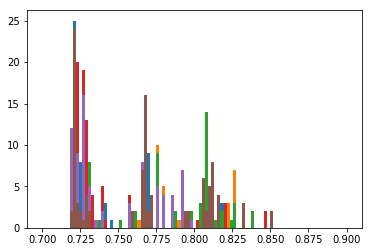

In [22]:
sigs = pickle.load(open("../out0/iter_0/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

sigs = pickle.load(open("../out0/iter_1/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

sigs = pickle.load(open("../out0/iter_2/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

sigs = pickle.load(open("../out0/iter_3/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

sigs = pickle.load(open("../out0/iter_4/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

sigs = pickle.load(open("../out0/iter_5/sigs.pickle", "rb"))
plt.hist([s[1] for s in sigs], bins=np.linspace(0.7,0.9,100))

In [154]:
od = "out12"
p = "iter_8"
an = "an_cuts_1"
r = load_analysis("../{0}/{1}".format(od, p), cross_sections, ["varA", "varB", an])
pars = pickle.load(open("../{0}/{1}/parameters.pickle".format(od, p), 'rb'))
templates = [c for c in r["ggh"][an].keys() if "__cat" in c and c.endswith("__inv_mass")]
Z = significance_templates(r, an, templates, do_plots=False)
dg = pars["baseline"]["categorization_trees"][an].make_dot()
print(Z)

((0.8536934176401261, 0.0), (0.706280018278541, 0.0))


In [146]:
dg.render("./best2")

'./best2.pdf'

Text(0, 0.5, 'Number of events / bin')

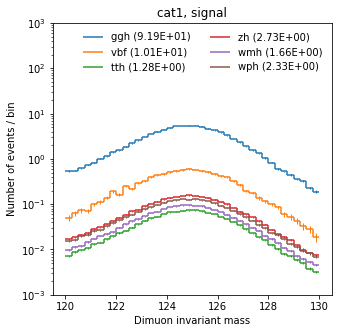

In [124]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.title("cat1, signal")
for hn in ["ggh", "vbf", "tth", "zh", "wmh", "wph"]:
    h = r[hn]["varA"]["hist__cat1__inv_mass"]["puWeight"]
    #h = (1.0 / np.sum(h.contents)) * h
    plot_hist_step(ax, h.edges, h.contents, np.sqrt(h.contents_w2), kwargs_step={"label": "{0} ({1:.2E})".format(hn, np.sum(h.contents))})
plt.legend(frameon=False, ncol=2)
plt.yscale("log")
plt.ylim(0.001,1000)
plt.xlabel("Dimuon invariant mass")
plt.ylabel("Number of events / bin")

Text(0, 0.5, 'Number of events / bin')

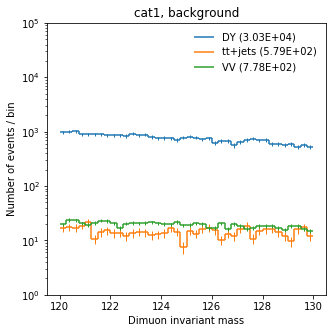

In [125]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.title("cat1, background")
labels = ["DY", "tt+jets", "VV"]
for i, hn in enumerate([
    "dy",
    ["ttjets_sl", "ttjets_dl"],
    ["ww_2l2nu", "wz_3lnu", "wz_3lnu", "wz_2l2q", "wz_1l1nu2q", "zz"]]):
    if isinstance(hn, str):
        h = r[hn]["varA"]["hist__cat1__inv_mass"]["puWeight"]
    else:
        h = sum([r[h]["varA"]["hist__cat0__inv_mass"]["puWeight"] for h in hn[1:]], r[hn[0]]["varA"]["hist__cat0__inv_mass"]["puWeight"])
    #h = (1.0 / np.sum(h.contents)) * h
    
    plot_hist_step(ax, h.edges, h.contents, np.sqrt(h.contents_w2),
                   kwargs_step={"label": "{0} ({1:.2E})".format(labels[i], np.sum(h.contents))})
plt.legend(frameon=False, ncol=1)
plt.yscale("log")
plt.ylim(1,10**5)
plt.xlabel("Dimuon invariant mass")
plt.ylabel("Number of events / bin")

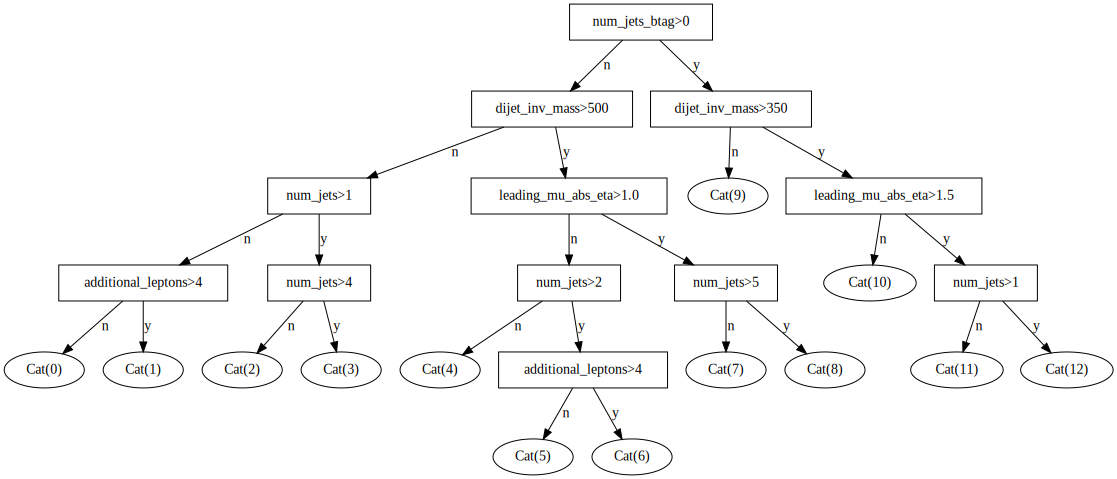

In [72]:
dg

In [132]:
ll = [
    0.8147304715050296,
0.814732947752736,
0.8146532899638426,
0.8149386266474693,
0.8146533254034578,
0.8147304909378165,
0.8147304809356468,
0.8157559358934028,
0.8154514838063862,
0.8154514675315407,
0.8213448525370646,
0.821344876915905,
0.8214488146264329,
0.8217118419034777,
0.8217117747499306,
0.8317175092317025,
0.831531543899603,
0.8315315144993738,
0.8315315167393913,
0.8314331156284317,
0.8218334593060803,
0.821253824555333,
0.8219174632803476,
0.8220184822922744,
0.8219174309867232,
0.8276092727296359,
0.8280178216637966,
0.8379917100472358,
0.8379916767060017,
0.8393955282179687,
0.809982273502873,
0.8100506883894251,
0.8100506498741723,
0.8100506671198081,
0.8100618973998616,
0.8100643999904529,
0.8103270419303087,
0.8415334141557811,
0.8415334116657126,
0.8415334382264422,
0.8327802686063532,
0.8341845232020224,
0.8341845525087482,
0.8341845276678093,
0.8341845745585699,
0.834184603027959,
0.8341845181780121,
0.8341845592074283,
0.8341845659061083,
0.8341845363202712,
0.808087681231699,
0.8146990386513773,
0.8273872984275633,
0.8273872055640195,
0.8395716367733388,
0.8396528065770322,
0.839759046973921,
0.8397591886531912,
0.839759094939704,
0.8403734546605783,
0.8190104525178963,
0.8193776150766451,
0.8193776497436135,
0.8193675149918348,
0.8193776764542275,
0.8193776110984683,
0.8193776625306097,
0.8258154045934603,
0.8258154294042064,
0.8258154220737588,
0.8330838145280283,
0.8586329746224491,
0.8587320024674175,
0.8587358018467146,
0.8593834681527194,
0.8598374921233741,
0.859837515681623,
0.8618110064912815,
0.8621649836865388,
0.8618147906755644,
0.8379073263606799,
0.8378449062954656,
0.837844838489743,
0.8382414775711879,
0.841882746668973,
0.8418827192895852,
0.8418828332320817,
0.841817971184266,
0.8418827914716054,
0.8424929826836679,
0.8323202073554329,
0.83232106195111,
0.8323913427984817,
0.8335480232464868,
0.8357708402194168,
0.8354564465221821,
0.8358217018798,
0.835384690519973,
0.8356069104422701,
0.8356069408136557,
0.8197603283172704,
0.8195047565515308,
0.8239910556423468,
0.8239911073516537,
0.8239910658146697,
0.8303251591704642,
0.8307172869774113,
0.8307996035092509,
0.8307995435359922,
0.8307995471792277,
0.8318318401723009,
0.8318318480095316,
0.8318318088233776,
0.8318318188998174,
0.8318318494090371,
0.8318326672796281,
0.8318326420885541,
0.8318639083825226,
0.8322188402089336,
0.8356756887704624,
0.8094895067139742,
0.809489616874921,
0.8256013954525788,
0.8258975832828777,
0.8258976061177694,
0.8258976007614368,
0.8371544554463246,
0.8370348769155279,
0.8536934176401261,
]
ll = list(chunks(ll, 10))

In [133]:
len(ll)

13

In [134]:
[len(l) for l in ll]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9]

Text(0, 0.5, 'Best achieved significance per iteration')

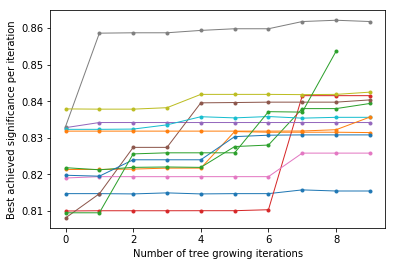

In [139]:
for i in range(len(ll)):
    plt.plot(ll[i], marker=".", lw=1)
plt.xlabel("Number of tree growing iterations")
plt.ylabel("Best achieved significance per iteration")